<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [58]:
!kaggle datasets download -d shivam2503/diamonds
!kaggle datasets download -d datascientistanna/customers-dataset
!mkdir dataset
!unzip -o -q /content/diamonds.zip -d /content/dataset
!unzip -o -q /content/customers-dataset.zip -d /content/dataset

diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)
customers-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists


In [59]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [60]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Load data

In [61]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)
california_housing = datasets.fetch_california_housing(as_frame=True)
diamonds_df = pd.read_csv("/content/dataset/diamonds.csv", sep=",", header=0)
customers_df = pd.read_csv("/content/dataset/Customers.csv", sep=",", header=0)

In [62]:
diamonds_df.drop(['Unnamed: 0'], axis=1, inplace=True)

Iris

In [63]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [65]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

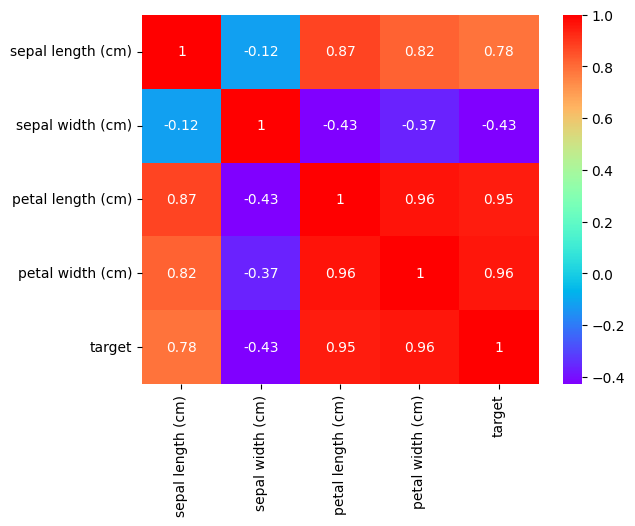

In [66]:
sns.heatmap(iris.frame.corr(), annot=True, cmap='rainbow')

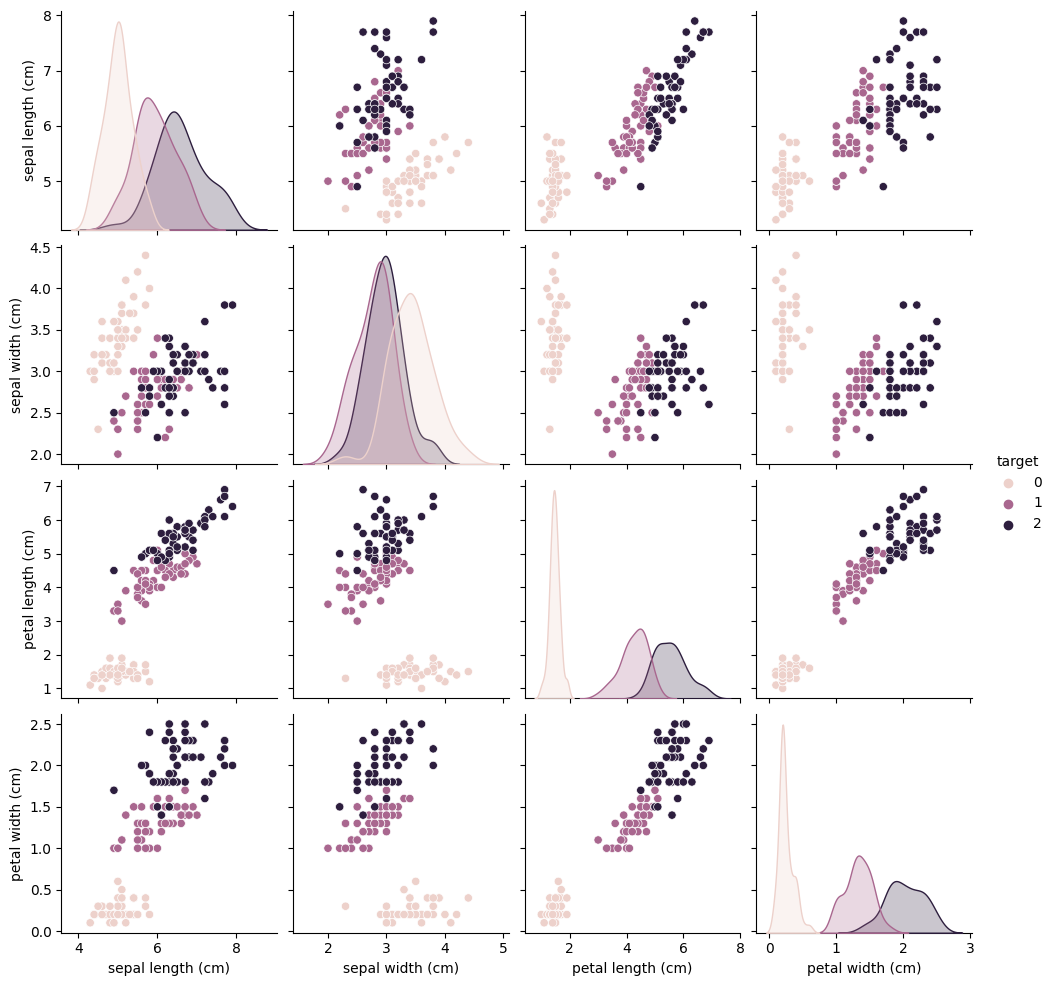

In [67]:
sns.pairplot(iris.frame, hue='target', height=2.5)

Wine

In [ ]:
wine.frame

In [ ]:
wine.frame.info()

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(wine.frame.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
sns.pairplot(wine.frame, hue='target', height=2.5)

California

In [ ]:
california_housing.frame.info()

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(california_housing.frame.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
temp_scaler = StandardScaler(copy=True)

standardized_housing = pd.DataFrame(temp_scaler.fit_transform(california_housing.frame), columns=california_housing.frame.columns)
sns.jointplot(data=standardized_housing, x='MedHouseVal', y='MedInc', kind="kde")

Diamonds

In [ ]:
diamonds_df.info()

In [ ]:
diamonds_df.head()
# TODO: how analyze nonnumerical data?

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(diamonds_df.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [78]:
# standardized_diamonds = pd.DataFrame(temp_scaler.fit_transform(diamonds_df), \
# columns=diamonds_df.columns)
diamonds_df.head()
numerical = ['carat', 'depth', 'table','price', 'x', 'y', 'z']
categorical = ['cut', 'color', 'clarity']

In [79]:
diamonds_df.drop(categorical, inplace=True, axis=1)

Customers


In [ ]:
customers_df

In [81]:
encoder = OrdinalEncoder()

customers_df['Gender'] = encoder.fit_transform(customers_df.Gender.values.reshape(-1, 1))
customers_df['Profession'] = encoder.fit_transform(customers_df.Profession.values.reshape(-1, 1))

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(customers_df.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
sns.pairplot(customers_df, hue='Profession', height=2.5)

In [ ]:
sns.pairplot(customers_df, hue='Gender', height=2.5)

# Zad 1

In [24]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('dim_reduction', PCA(n_components=2)),
    ]
)

In [25]:
iris_df = iris.frame.drop(['target'], axis=1)

In [26]:
iris_pca = pd.DataFrame(data=pca_pipeline.fit_transform(iris_df), columns = ['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

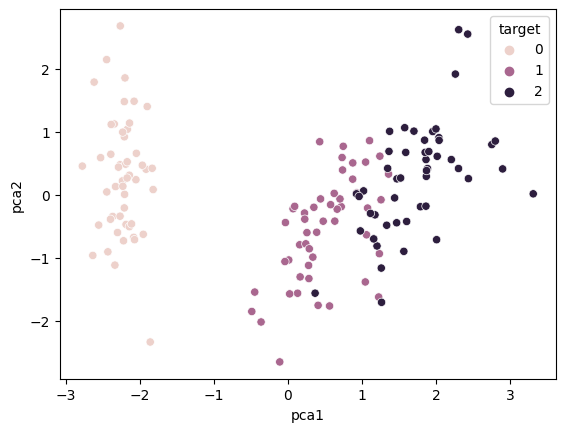

In [27]:
sns.scatterplot(data=iris_pca, x='pca1', y='pca2', hue=iris.frame['target'])

In [28]:
wine_df = wine.frame.drop(['target'], axis=1)

In [29]:
wine_pca = pd.DataFrame(data = pca_pipeline.fit_transform(wine_df), columns = ['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

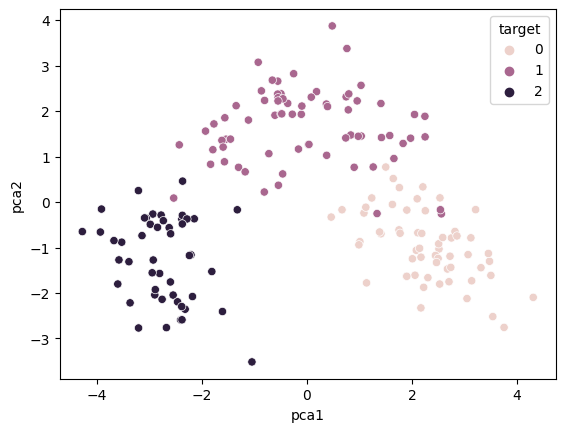

In [30]:
sns.scatterplot(data=wine_pca, x='pca1', y='pca2', hue=wine.frame['target'])

In [99]:
customers_df = customers_df.dropna().reset_index(drop=True)
customers_temp = customers_df.drop(['Gender', 'Profession'], axis=1)
customers_temp.head()
# print(customers_df.shape)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19,15000,39,1,4
1,2,21,35000,81,3,3
2,3,20,86000,6,1,1
3,4,23,59000,77,0,2
4,5,31,38000,40,2,6


In [ ]:
customers_pca = pd.DataFrame(pca_pipeline.fit_transform(customers_temp), columns = ['pca1', 'pca2'])
sns.scatterplot(data=customers_pca, x='pca1', y='pca2', hue=customers_df['Gender'])
# TODO: finde better dataset

# Zad 2

In [91]:
# california_housing.frame.info()
california_pca = pd.DataFrame(pca_pipeline.fit_transform(california_housing.frame), columns = ['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

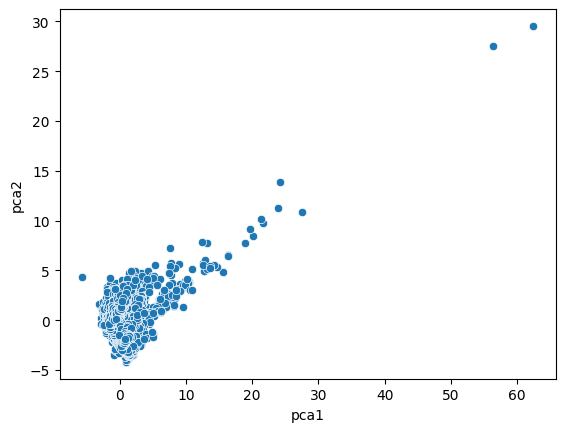

In [92]:
sns.scatterplot(data=california_pca, x='pca1', y='pca2')

In [102]:
diamonds_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [103]:
diamonds_pca = pd.DataFrame(pca_pipeline.fit_transform(diamonds_df), columns = ['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

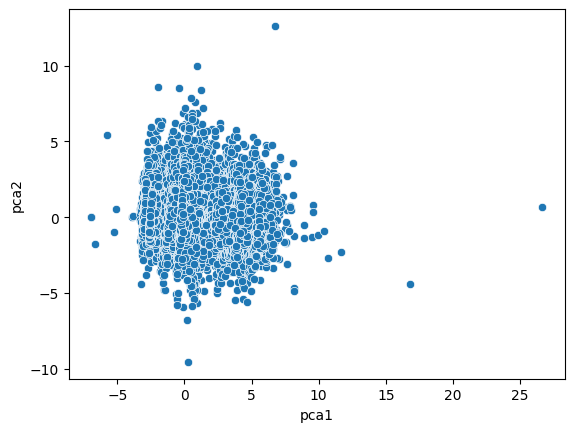

In [104]:
sns.scatterplot(data=diamonds_pca, x='pca1', y='pca2')